# **Análisis Cluster**
El análisis cluster, o análisis de conglomerados, es una técnica estadística multivariante, cuyo objetivo es agrupar los elementos o variables análizadas en distintos grupos (clusters) en función de la homogeneidad existente entre ellas. 

En este caso nos vamos a centrar en el **método jerárquico**. Este método puede ser aglomerativo o divisivo, dependiendo si partimos de cluster individuales que se van conbinando y que convergen en uno solo o divisivo si es de forma opuesta. 

La gran diferencia con el método K-means es que este no requiere que se especifique de forma previa con cuantos cluster queremos contar. 

Para llevar a cabo nuestro ejemplo, escogeremos el dataset **ecv_cluster**, elaborado a partir de los datos publicados por el INE.

## **Jerárquico**

###**Carga de librerias y datos**
Cargamos las librerias que vamos a utilizar en el modelo.

In [1]:
# Preparación de los datos 
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
# Modelado 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
# Visualización
import matplotlib.pyplot as plt


Subimos a Colab el archivo que vamos a utilizar, en nuestro caso es **ecv_cluster**.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ecv_cluster.xlsx to ecv_cluster.xlsx


Visualizamos los datos del archivo que acabamos de cargar.

In [3]:
datos=pd.read_excel('ecv_cluster.xlsx')
datos.head()

,ccaa,taspobex,taspob,tascar,tasvivtrab
0,Andalucía,35.1,28.5,8.0,13.5
1,Aragón,18.5,16.0,1.7,6.1
2,"Asturias, Principado de",27.7,22.2,4.5,17.8
3,"Balears, Illes",22.0,14.1,6.9,4.5
4,Canarias,36.3,29.9,10.7,15.3


Creamos las diferentes variables que vamos a utilizar. En este caso, en la variable columnas, seleccionaremos la tasa de riesgo de pobreza o exclusión social (indicador AROPE) y la tasa de carencia material severa. Después, la lista que acabamos de crear, la convertimos en un DataFrame (resultado). Además, también tenemos nuestra serie con las comunidades autónomas. 

In [4]:
columnas = ["taspobex", "tascar"]
resultado = datos[columnas]
comunidades = datos["ccaa"]

### **Dendrograma**
Para representar gráficamente nuestro modelo, escogeremos una tipología como la del dendrograma, ya que nos permitirá observar los dintintos cluster que se han formado, las relaciones entre las diferentes variables y la distancia entre unas y otras. 

Además, en nuestro caso seleccionaremos que las variables se situen a la izquierda, es decir, situaremos el dendrograma a la derecha, para que podamos leer las variables sin ningún tipo de problema. 

Realizamos un corte en nuestro dendograma para ver cuantos cluster vamos a escoger. Hacemos el corte en 5, por lo que tendremos 4 clusters. Para realizarlo utilizaremos la función axvline( ), ya que queremos que la linea sea vertical, dado que hemos orientado el dendograma a la derecha. 


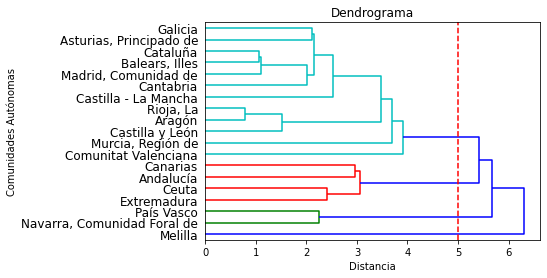

In [5]:
W = hierarchy.linkage(resultado, 'single')
dendrograma = sch.dendrogram(W,labels=np.array(comunidades),orientation='right')

plt.title('Dendrograma')
plt.xlabel('Distancia')
plt.ylabel('Comunidades Autónomas')
plt.axvline(x=5, color='r', linestyle='--')
plt.show()


### **Matriz de distancias**
Para ver numéricamente la distancia entre nuestras variables (CCAA), realizamos la matriz de distancias, la cual nos muestra la distancia euclídea entre los puntos analizados, siendo una matriz *n x n*.

Inicialmente tenemos el vector con las distancias entre los datos analizados, a través de **pdist( )**. Posteriormente, **squareform( )** convierte el vector de distancia en una matriz de distancia. Por último, contruimos nuestra matriz. 

In [6]:
dist=pdist(resultado)  

DIST=squareform(dist) 

df=pd.DataFrame(DIST,index=comunidades,columns=comunidades) 
pd.set_option('precision',1)
df.head()

ccaa,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",Ceuta,Melilla
ccaa,,,,,,,,,,,,,,,,,,,
Andalucía,0.0,17.8,8.2,13.1,3.0,12.0,15.9,7.2,12.4,6.8,3.7,9.8,14.2,5.4,23.2,21.4,17.1,4.0,9.4
Aragón,17.8,0.0,9.6,6.3,19.9,5.9,2.3,11.4,6.2,14.6,21.4,8.0,5.7,12.7,7.9,5.7,0.8,20.8,26.8
"Asturias, Principado de",8.2,9.6,0.0,6.2,10.6,4.0,8.0,2.5,5.2,7.2,11.8,2.1,7.2,3.7,15.8,13.8,9.0,11.3,17.4
"Balears, Illes",13.1,6.3,6.2,0.0,14.8,3.0,4.0,8.7,1.1,8.6,16.8,4.1,1.1,7.7,10.0,8.3,5.5,16.8,21.6
Canarias,3.0,19.9,10.6,14.8,0.0,14.1,18.0,10.0,14.2,7.0,3.1,11.9,15.9,7.3,24.7,23.1,19.2,5.0,6.9


Una vez sabemos los cluster que vamos a utilizar, en nuestro caso 4, llamamos a la función AgglomerativeClustering(), le indicamos el número de clusters, la métrica utilizada para relacionar las distancias, en este caso 'euclidean' y el método 'ward' como método general, que identifica los 2 clusters donde la suma de sus varianzas es menor, basandose en el valor óptimo de una función objetivo. 

Vamos a escalar nuestro DataFrame (resultado), para ello utilizaremos la función scale(). Además, llamamos a la función fit_predict para llevar a cabo nuestro agrupamiento y así crear el array con la asignación de clusters. 


In [7]:
clusters= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
resultado_escalado = scale(resultado)
clusters.fit_predict(resultado_escalado)


array([2, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 1, 2, 1, 1, 0, 2, 3])

Plasmamos en una tabla la asignación de los clusters a nuestra comunidades. clusters.labels_ es el array que hemos hecho anteriormente y que contiene el cluster al que petenece cada comunidad. 

In [8]:
clusters_ccaa=pd.concat([comunidades,pd.DataFrame(clusters.labels_)],axis=1)
clusters_ccaa.rename(columns={"ccaa":"Comunidades Autónomas",0:"Cluster"},inplace=True)
clusters_ccaa

,Comunidades Autónomas,Cluster
0,Andalucía,2
1,Aragón,0
2,"Asturias, Principado de",0
3,"Balears, Illes",1
4,Canarias,3
5,Cantabria,0
6,Castilla y León,0
7,Castilla - La Mancha,0
8,Cataluña,1
9,Comunitat Valenciana,3


###**Representación gráfica**
Vamos a plasmar gráficamente la situación de los puntos en el plano. Lo primero que haremos será definir nuestra función a plasmar, en este caso situación. Después, utilizaremos la función ax.text( ) para que salgan los nombres de las CCAA, así como ax.set_xlim y ax.set_ylim para decirles en que puntos se mueven nuestros ejes. Por último, fig.set_figheight( ) y fig.set_figwidth( ) nos proporcionan la altura y anchura de nuestro gráfico respectivamente. 


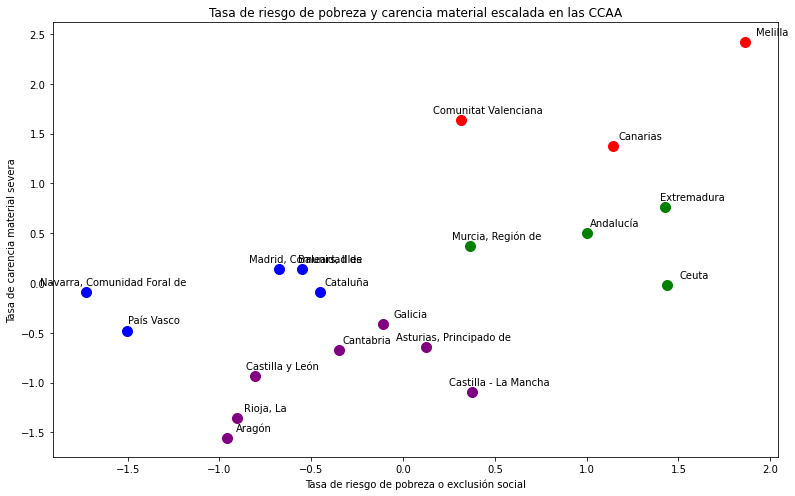

In [9]:
def situacion(x,y,z):
    fig, ax = plt.subplots()
    for i in range(19):       
      ax.text(x[i]+0.15,y[i]+0.1, z[i], color = 'black', ha = 'center', va = 'center') 
    ax.set_title('Tasa de riesgo de pobreza y carencia material escalada en las CCAA')
    ax.set_xlabel('Tasa de riesgo de pobreza o exclusión social')
    ax.set_ylabel('Tasa de carencia material severa')
    fig.set_figheight(8)
    fig.set_figwidth(13)
    fig.show()
    plt.scatter(resultado_escalado[clusters.labels_==0,0],resultado_escalado[clusters.labels_==0,1],s=100, c='purple',label='Cluster1')
    plt.scatter(resultado_escalado[clusters.labels_==1,0],resultado_escalado[clusters.labels_==1,1],s=100, c='blue',label='Cluster2')
    plt.scatter(resultado_escalado[clusters.labels_==2,0],resultado_escalado[clusters.labels_==2,1],s=100, c='green',label='Cluster3')
    plt.scatter(resultado_escalado[clusters.labels_==3,0],resultado_escalado[clusters.labels_==3,1],s=100, c='red',label='Cluster4')

situacion(resultado_escalado[:,0],resultado_escalado[:,1],comunidades)

Observamos diferencias entre los distintos clusters. El cluster azul representa a las comunidades con una baja tasa de riesgo de pobreza pero con una tasa de carencia material media, ocurre lo contrario en el cluster morada. En el polo opuesto se encuentras los clusters rojo y verde, aunque observamos que en este último la tasa de riesgo de pobreza está más acentuada que la de carecnia material, en comparación con las demás Comunidades Autonomas. El caso más extremo es el de Melilla, con altas tasas en ambas variables. 